In [9]:
import os
import pandas as pd

path = "pipeline_output/exp_100k_all3"

# models are subfolders in path if not named "comparison"
models = [f for f in os.listdir(path) if f != "comparison"]

# in each subfolder is one csv file with the predicted data
predicted_data = {}
for model in models:
    # get the csv file
    # .DS_Store
    if model == ".DS_Store":
        continue
    # if not dir
    if not os.path.isdir(os.path.join(path, model)):
        continue
    for file in os.listdir(os.path.join(path, model)):
        if file.endswith(".csv"):
            file_path = os.path.join(path, model, file)
            predicted_data[model] = pd.read_csv(file_path)
            break


print(predicted_data)


{'CTGAN':      gender   salary     rent  age  north_coord  east_coord  postal_code  \
0         A  7360.11  1686.85   36      1251827     2755001         8829   
1         B     0.00     6.66   16      1115306     2502433         1251   
2         A  2304.86   430.45   62      1215708     2654329         6098   
3         A  3757.70   630.06   49      1185512     2539464         1109   
4         A  4495.26   919.97   53      1271235     2658374         5774   
...     ...      ...      ...  ...          ...         ...          ...   
9995      A  7688.87  1758.16   22      1269252     2687766         8171   
9996      B     0.00     2.84    7      1114372     2500051         1149   
9997      A    26.10    -0.21    4      1204646     2584620         2916   
9998      B     9.24     5.38    9      1204777     2632005         5043   
9999      A  3720.25   566.88   50      1285258     2697643         8297   

     canton  building_category    height      weight        z1         z2  
0

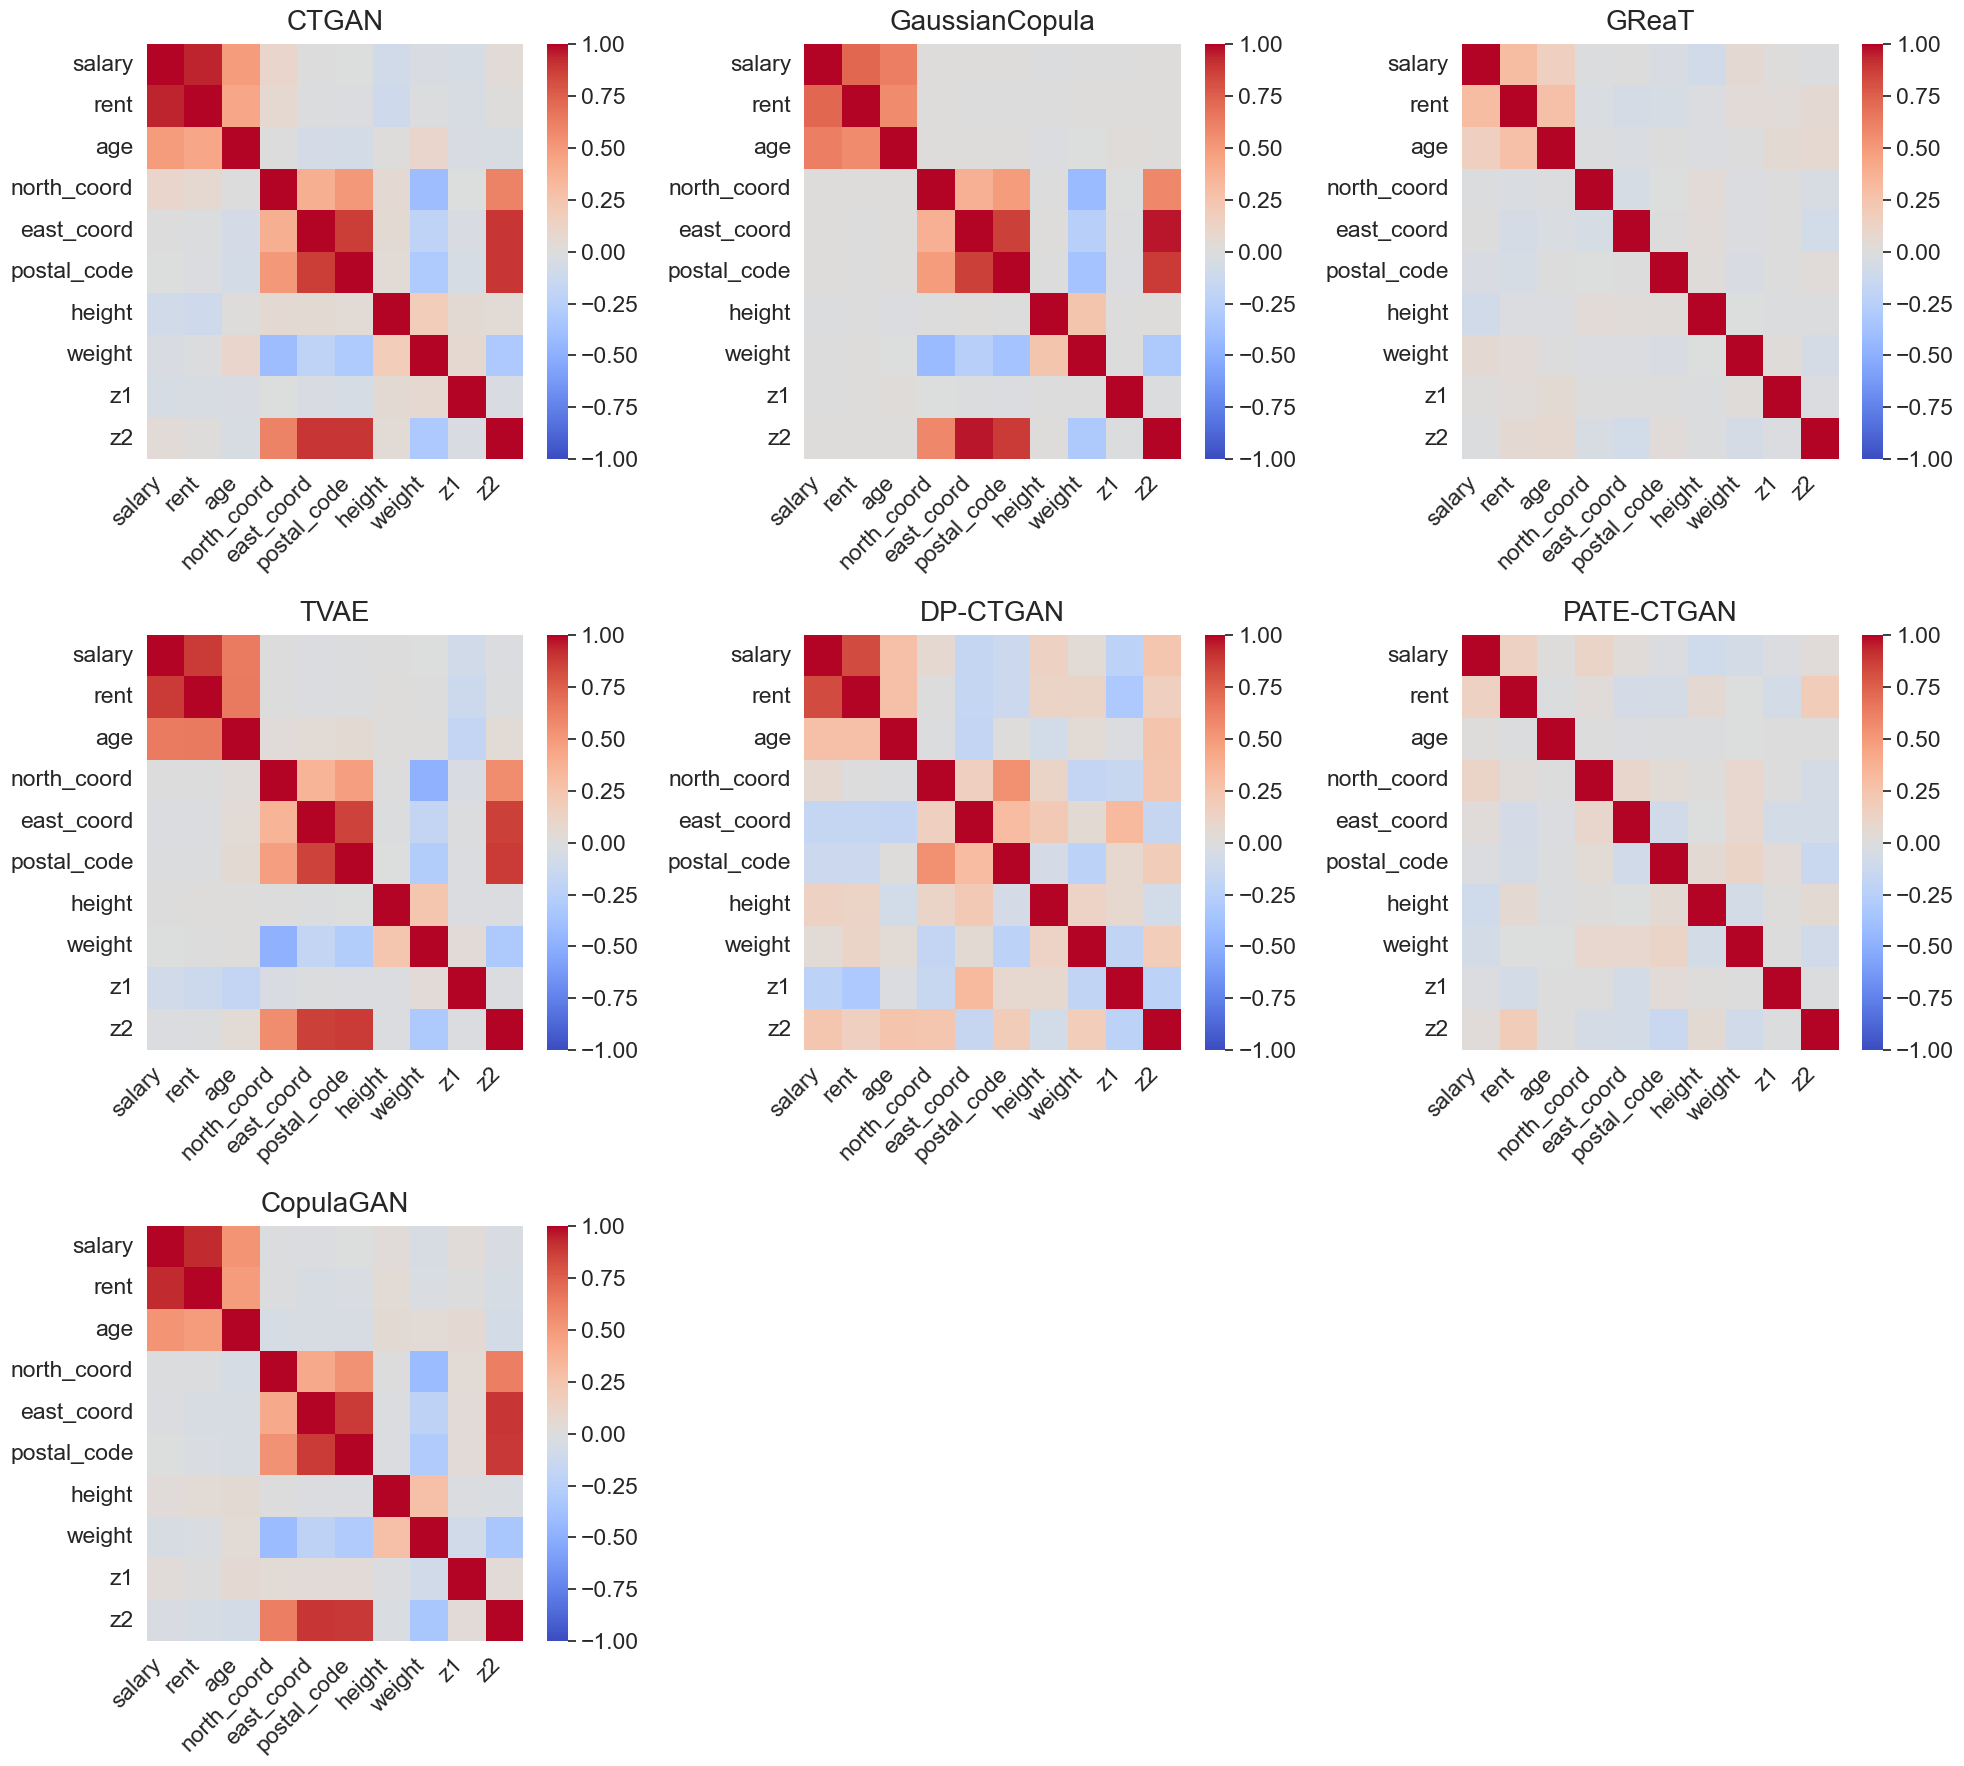

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


def plot_correlation_heatmaps(synthetic_data):
    # Get numeric columns for correlation analysis
    numeric_columns = synthetic_data["CTGAN"].select_dtypes(include=[np.number]).columns

    # Calculate number of rows and columns needed for the subplot grid
    n_plots = len(synthetic_data)
    n_cols = 3
    n_rows = (n_plots + n_cols - 1) // n_cols

    # Create figure
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6 * n_rows))
    axes = axes.flatten()

    # Plot correlation matrices for each model
    for idx, (name, data) in enumerate(synthetic_data.items()):
        correlation_matrix = data[numeric_columns].corr()

        sns.heatmap(
            correlation_matrix,
            ax=axes[idx],
            cmap="coolwarm",
            vmin=-1,
            vmax=1,
            center=0,
            annot=False,
            cbar=True,
        )

        axes[idx].set_title(name, fontsize=20, pad=10)  # Increased title font size
        axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45, ha="right")
        axes[idx].set_yticklabels(axes[idx].get_yticklabels(), rotation=0)

    # Remove any unused subplots
    for i in range(len(synthetic_data), len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()


# Call the function with your predicted_data
plot_correlation_heatmaps(predicted_data)

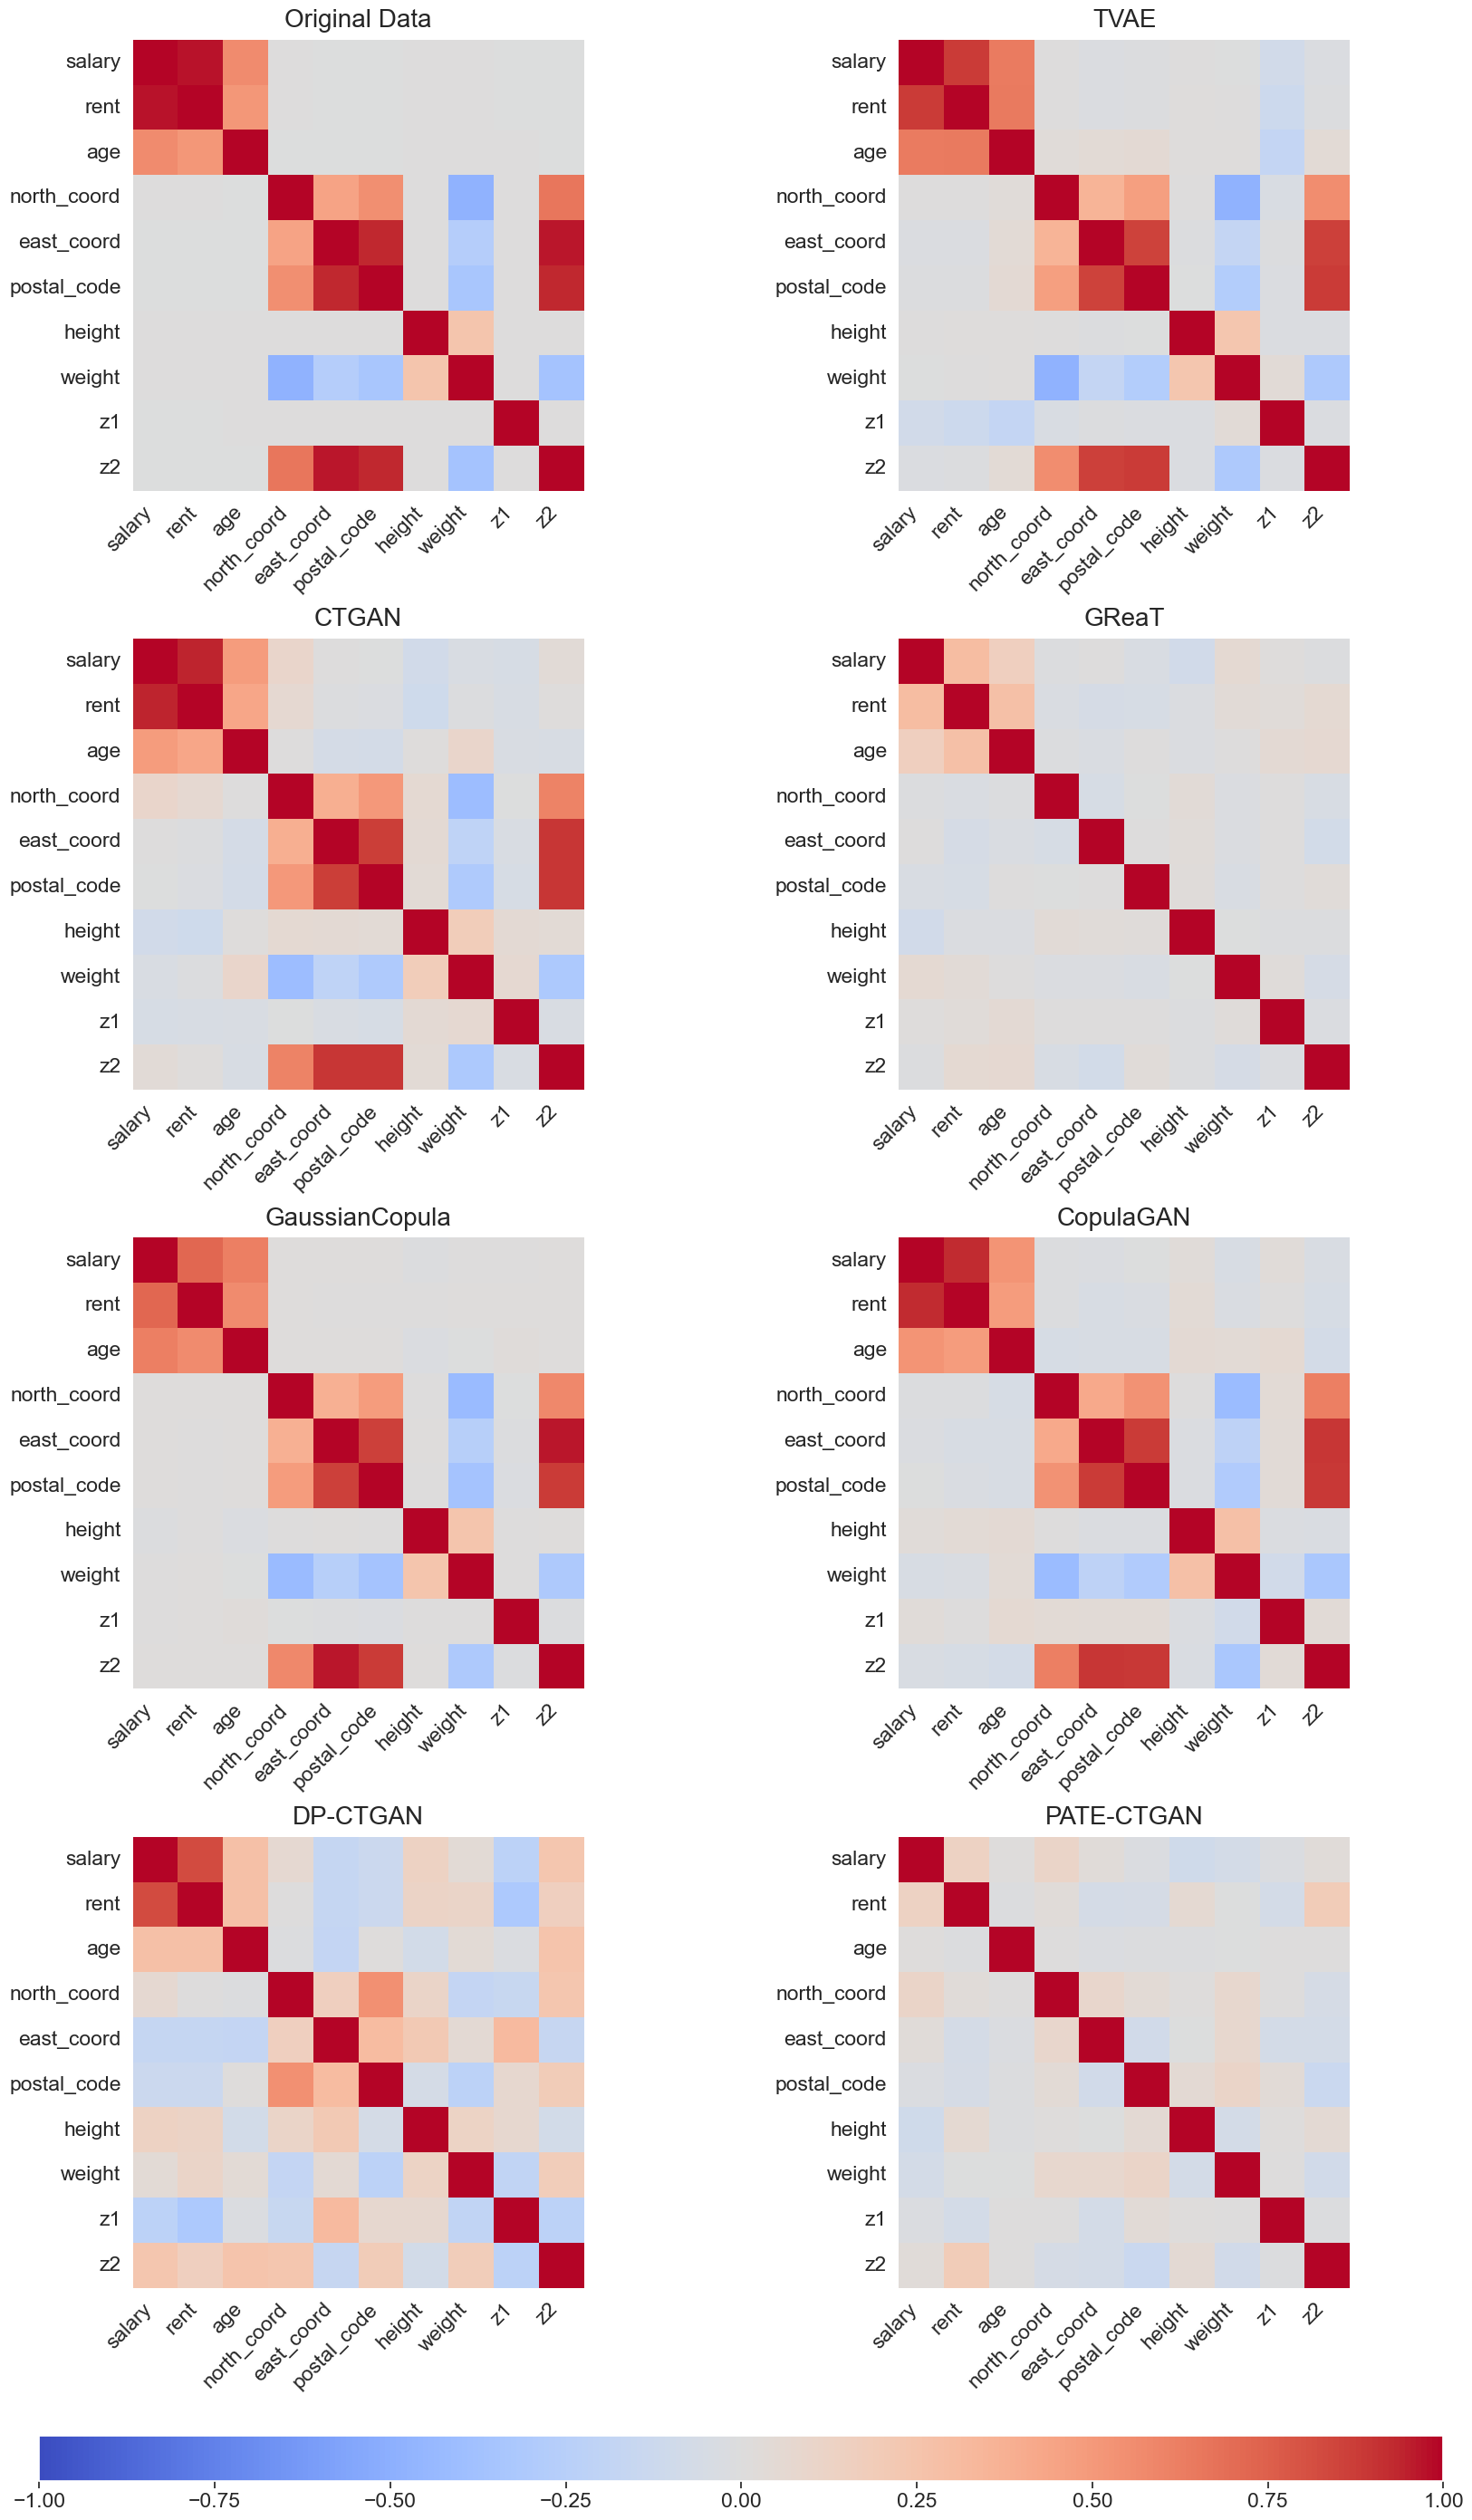

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# First, load the original data
original_data = pd.read_csv("data/sample_level_3_100k.csv")
if "Unnamed: 0" in original_data.columns:
    original_data = original_data.drop("Unnamed: 0", axis=1)

# Create ordered dictionary with original data first, then models in the specified order
ordered_data = {"Original Data": original_data}
model_order = [
    "TVAE",
    "CTGAN",
    "GReaT",
    "GaussianCopula",
    "CopulaGAN",
    "DP-CTGAN",
    "PATE-CTGAN",
]

# Add the synthetic data in the specified order
for model in model_order:
    if model in predicted_data:
        ordered_data[model] = predicted_data[model]


def plot_correlation_heatmaps(synthetic_data):
    # Get numeric columns for correlation analysis
    numeric_columns = (
        next(iter(synthetic_data.values())).select_dtypes(include=[np.number]).columns
    )

    # Set fixed layout
    n_rows = 4
    n_cols = 2

    # Create figure with adjusted size for square plots
    fig = plt.figure(figsize=(20, 35))

    # Create main gridspec for heatmaps
    gs = fig.add_gridspec(
        n_rows + 1, n_cols, height_ratios=[1, 1, 1, 1, 0.1], hspace=0.4, wspace=0.2
    )

    # Create a list to store all heatmap objects
    heatmaps = []

    # Plot correlation matrices for each model
    for idx, (name, data) in enumerate(synthetic_data.items()):
        ax = fig.add_subplot(gs[idx // n_cols, idx % n_cols])
        correlation_matrix = data[numeric_columns].corr()

        hm = sns.heatmap(
            correlation_matrix,
            ax=ax,
            cmap="coolwarm",
            vmin=-1,
            vmax=1,
            center=0,
            annot=False,
            cbar=False,
            square=True,
        )
        heatmaps.append(hm)

        ax.set_title(name, fontsize=20, pad=10)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

    # Add a single horizontal colorbar at the bottom
    cbar_ax = fig.add_subplot(gs[-1, :])
    plt.colorbar(heatmaps[0].get_children()[0], cax=cbar_ax, orientation="horizontal")

    plt.show()


# Call the function with the ordered data
plot_correlation_heatmaps(ordered_data)

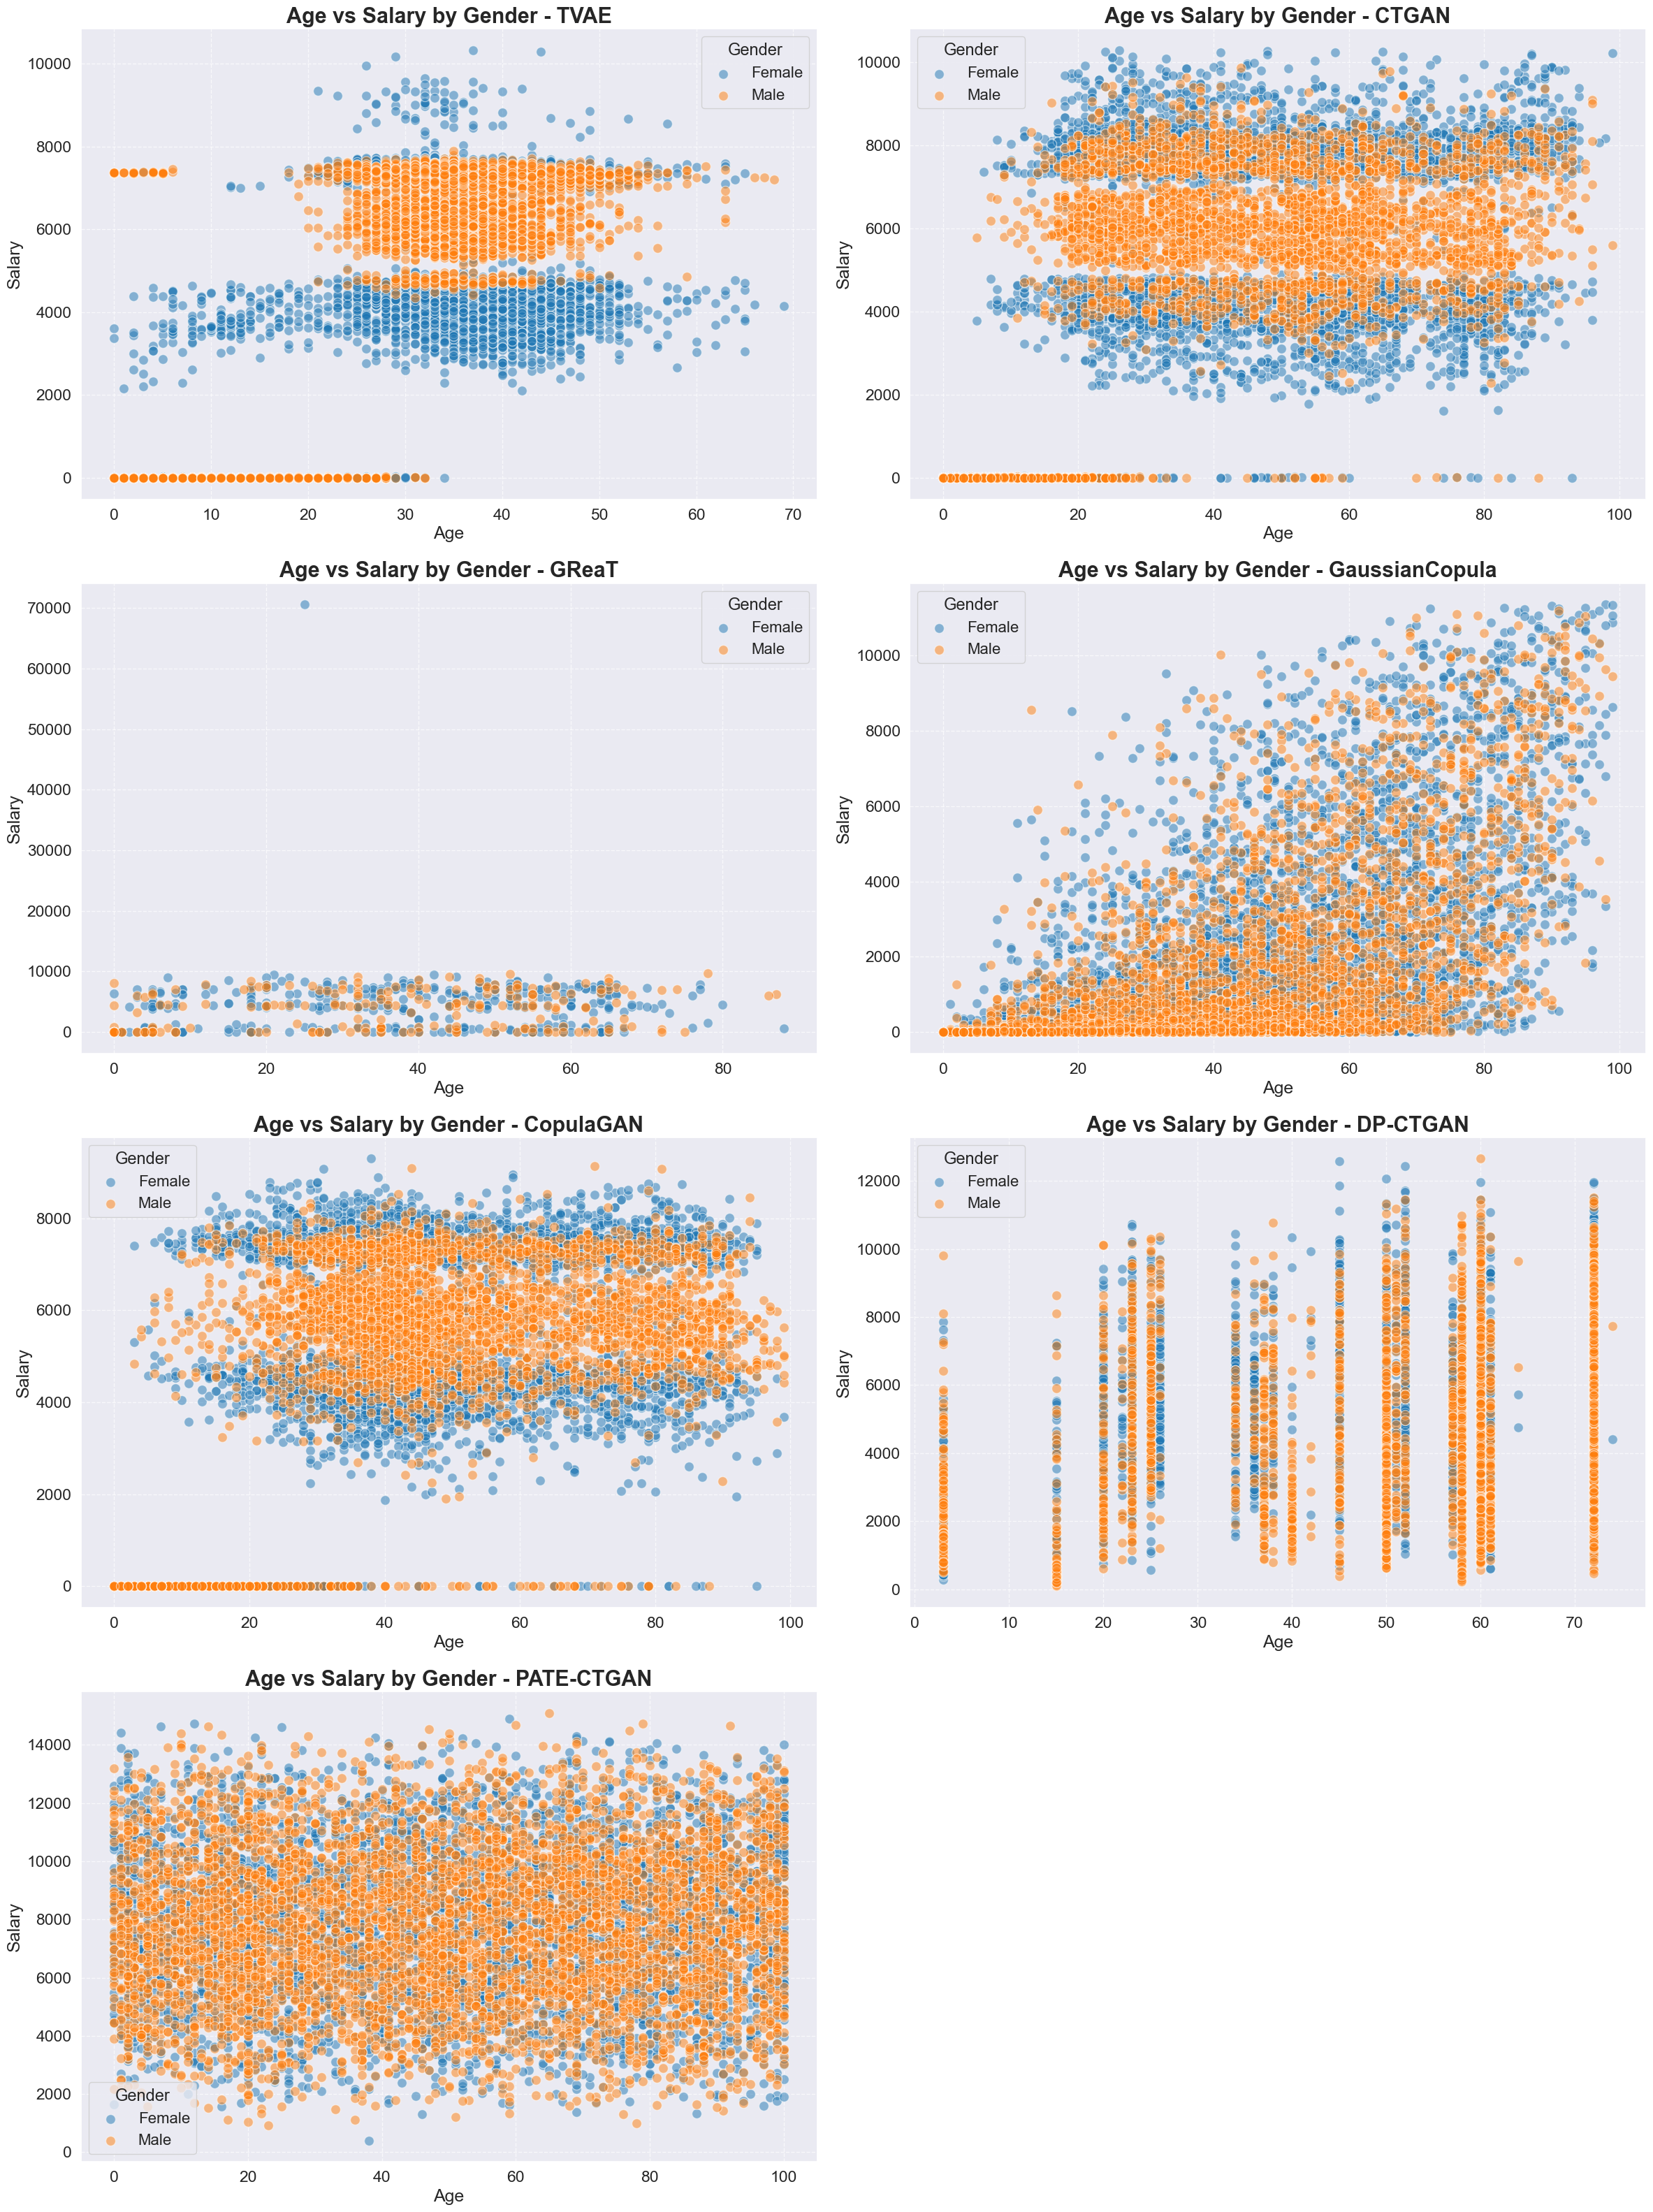

In [36]:
# Generate a grid of plots showing salary vs age with different colors for gender
import matplotlib.pyplot as plt
import pandas as pd

# Determine the number of keys to set grid size
num_keys = len(predicted_data.keys())
n_cols = 2
n_rows = (num_keys + n_cols - 1) // n_cols  # Calculate rows needed

# Create figure with a grid layout
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12 * n_cols, 8 * n_rows))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Define the order of models
model_order = [
    "TVAE",
    "CTGAN",
    "GReaT",
    "GaussianCopula",
    "CopulaGAN",
    "DP-CTGAN",
    "PATE-CTGAN",
]

# Loop over all keys in the specified order and create a plot for each
for idx, key in enumerate(model_order):
    if key in predicted_data:
        ax = axes[idx]
        dp_ctgan_data = predicted_data[key]

        for gender, color in zip(["A", "B"], ["#1f77b4", "#ff7f0e"]):
            subset = dp_ctgan_data[dp_ctgan_data["gender"] == gender]
            ax.scatter(
                subset["age"],
                subset["salary"],
                c=color,
                label="Female" if gender == "A" else "Male",
                alpha=0.5,
                edgecolors="w",
                s=100,
            )

        ax.set_xlabel("Age", fontsize=18)  # Increased font size
        ax.set_ylabel("Salary", fontsize=18)  # Increased font size
        ax.set_title(f"Age vs Salary by Gender - {key}", fontsize=22, fontweight="bold")
        ax.legend(
            title="Gender", fontsize=16, title_fontsize="17"
        )  # Increased font size
        ax.grid(True, linestyle="--", alpha=0.7)

# Hide any unused subplots
for ax in axes[num_keys:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()
